# Challenge
**Author:** Wenyue Zhu

Gathering the Weather Data for 5 Western European countries and comparing the precipitation levels of each

In [297]:
import json
import pandas as pd
import requests 
import matplotlib.pyplot as plt
import numpy as np

# Data Collection

**1. Finding and extracting the latitude and longitude values for any number of country specified under the selected_countries and selected_cities variables**

In [298]:
selected_countries = ['FR', 'GB', 'DE', 'ES', 'CH']
selected_cities    = ['Paris', 'London', 'Berlin', 'Madrid', 'Bern']

In [299]:
def get_lat_lon_multiple(country_codes, cities):
    filepath = '../data/world_cities.csv'
    world_cities = pd.read_csv(filepath)
    locations = {}

    # Loop through each country-city pair
    for country_code, city in zip(country_codes, cities):
        # Filter data for each pair
        city_data = world_cities[(world_cities['country'] == country_code) & 
                                 (world_cities['name'] == city)]

        # Extract latitude and longitude from the first match
        latitude = city_data.iloc[0]['lat']
        longitude = city_data.iloc[0]['lng']
        
        # Store results in a dictionary with country-city as key
        locations[f"{city}"] = (latitude, longitude)
    
    return locations

locations = get_lat_lon_multiple(selected_countries, selected_cities)
print(locations)

{'Paris': (np.float64(48.85341), np.float64(2.3488)), 'London': (np.float64(51.50853), np.float64(-0.12574)), 'Berlin': (np.float64(52.52437), np.float64(13.41053)), 'Madrid': (np.float64(40.4165), np.float64(-3.70256)), 'Bern': (np.float64(46.94809), np.float64(7.44744))}


In [300]:
with open('../data/lat_lng.json', 'w') as file:
    json.dump(locations, file)

**2. Using the extracted lat, lng values to extract the rain data from the countries previously specified**

In [301]:
def get_forecast_data(latitude, longitude, start_date, end_date):

    base_forecast_url = "https://archive-api.open-meteo.com/v1/archive?"
    params_lat_long = "latitude=" + str(latitude) + "&longitude="  + str(longitude)
    params_others = f"&start_date={start_date}&end_date={end_date}&daily=rain_sum&timezone=auto"

    final_url = base_forecast_url + params_lat_long + params_others
        
    response = requests.get(final_url)

    forecast_data = response.json()
    forecast_temperatures = forecast_data['daily']
        
    return forecast_temperatures

In [302]:
total_rain = {}

for city, (lat, lon) in locations.items():
    year_rain = get_forecast_data(lat, lon, start_date='2023-01-01', end_date='2023-12-31')
    total_rain[city] = year_rain

print(total_rain)

{'Paris': {'time': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05', '2023-01-06', '2023-01-07', '2023-01-08', '2023-01-09', '2023-01-10', '2023-01-11', '2023-01-12', '2023-01-13', '2023-01-14', '2023-01-15', '2023-01-16', '2023-01-17', '2023-01-18', '2023-01-19', '2023-01-20', '2023-01-21', '2023-01-22', '2023-01-23', '2023-01-24', '2023-01-25', '2023-01-26', '2023-01-27', '2023-01-28', '2023-01-29', '2023-01-30', '2023-01-31', '2023-02-01', '2023-02-02', '2023-02-03', '2023-02-04', '2023-02-05', '2023-02-06', '2023-02-07', '2023-02-08', '2023-02-09', '2023-02-10', '2023-02-11', '2023-02-12', '2023-02-13', '2023-02-14', '2023-02-15', '2023-02-16', '2023-02-17', '2023-02-18', '2023-02-19', '2023-02-20', '2023-02-21', '2023-02-22', '2023-02-23', '2023-02-24', '2023-02-25', '2023-02-26', '2023-02-27', '2023-02-28', '2023-03-01', '2023-03-02', '2023-03-03', '2023-03-04', '2023-03-05', '2023-03-06', '2023-03-07', '2023-03-08', '2023-03-09', '2023-03-10', '2023-03-11', 

In [303]:
with open('../data/historical_rain.json', 'w') as file:
    json.dump(total_rain,file)

# 2. Simple Data Analysis across five countries

In [304]:
with open('../data/historical_rain.json', 'r') as file:
    rain_data = json.load(file)

type(rain_data)

dict

In [305]:
Paris_data = rain_data['Paris']
London_data = rain_data['London']
df = pd.DataFrame(London_data)
print(df)

           time  rain_sum
0    2023-01-01       4.0
1    2023-01-02       0.2
2    2023-01-03       3.2
3    2023-01-04       0.9
4    2023-01-05       0.1
..          ...       ...
360  2023-12-27       6.3
361  2023-12-28       0.4
362  2023-12-29       1.5
363  2023-12-30       3.6
364  2023-12-31       7.6

[365 rows x 2 columns]


<Axes: xlabel='time'>

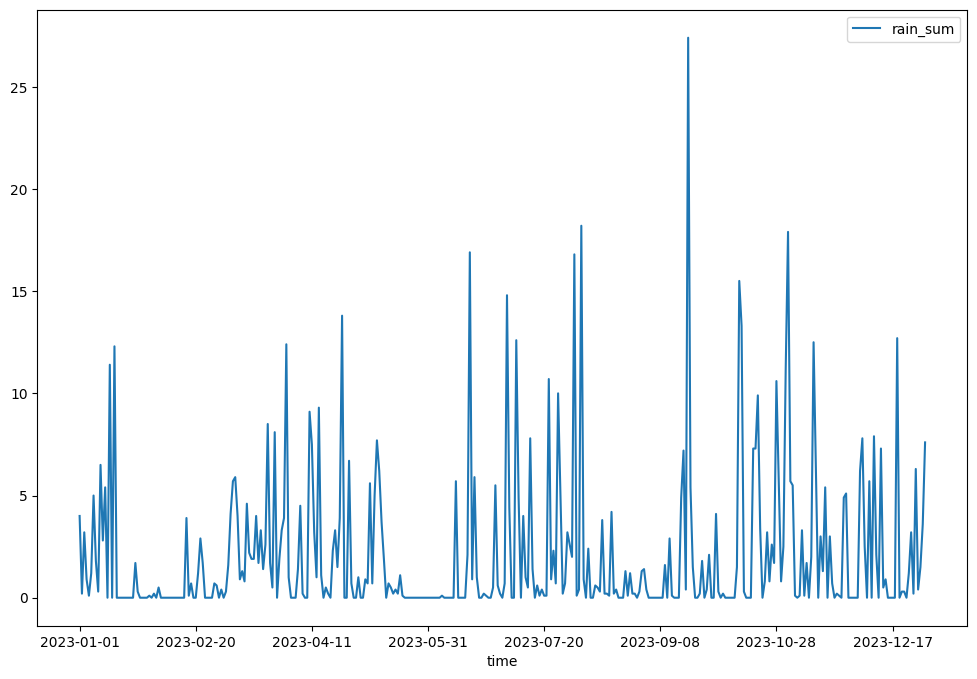

In [306]:
df.plot(x='time', y='rain_sum', figsize=(12, 8))

In [307]:
df['rain_sum']. min()

np.float64(0.0)

In [308]:
df['rain_sum'].max()

np.float64(27.4)

In [309]:
for cities in rain_data:
    df['{city}'] = pd.DataFrame(rain_data)[city]


print(df)

           time  rain_sum {city}
0    2023-01-01       4.0    NaN
1    2023-01-02       0.2    NaN
2    2023-01-03       3.2    NaN
3    2023-01-04       0.9    NaN
4    2023-01-05       0.1    NaN
..          ...       ...    ...
360  2023-12-27       6.3    NaN
361  2023-12-28       0.4    NaN
362  2023-12-29       1.5    NaN
363  2023-12-30       3.6    NaN
364  2023-12-31       7.6    NaN

[365 rows x 3 columns]
